In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import re
from nltk.stem import PorterStemmer

# **USING SUPPORT VECTOR MACHINES ON LINEAR CLASSIFICATION**

In [2]:
mat = loadmat('ex6data1.mat')
X = mat['X']
y = mat['y']

In [3]:
X.shape, y.shape

((51, 2), (51, 1))

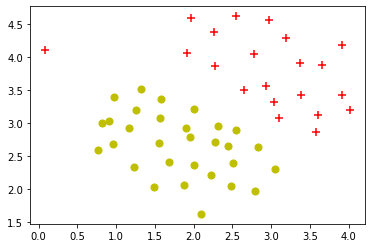

In [4]:
m, n = X.shape
pos, neg = (y==1).reshape(m ,1), (y==0).reshape(m, 1)
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], c='r', marker='+', s=50)
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c='y', marker='o', s=50)

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(X, y.ravel())

SVC(kernel='linear')

(1.5, 5.0)

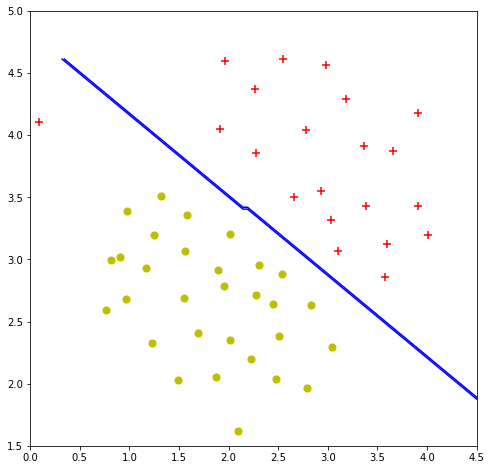

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(X[pos[:, 0], 0], X[pos[:, 0], 1], c='r', marker='+', s=50)
plt.scatter(X[neg[:, 0], 0], X[neg[:, 0], 1], c='y', marker='o', s=50)

X_1,X_2 = np.meshgrid(
    np.linspace(X[:,0].min(),X[:,1].max(),num=100),
    np.linspace(X[:,1].min(),X[:,1].max(),num=100)
)

plt.contour(X_1, X_2, classifier.predict(np.array([X_1.ravel(), X_2.ravel()]).T).reshape(X_1.shape), 1, colors="b")
plt.xlim(0,4.5)
plt.ylim(1.5,5)

# SVM WITH GAUSSIAN KERNEL

In [7]:
mat2 = loadmat('ex6data2.mat')
X2 = mat2['X']
y2 = mat2['y']
X2.shape, y2.shape

((863, 2), (863, 1))

(0.4, 1.0)

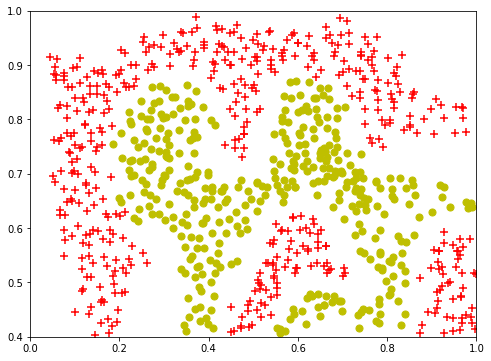

In [8]:
m2, n2 = X2.shape

pos2, neg2 = (y2==1).reshape(m2, 1), (y2==0).reshape(m2, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X2[pos2[:, 0], 0], X2[pos2[:, 0], 1], c='r', marker='+', s=50)
plt.scatter(X2[neg2[:, 0], 0], X2[neg2[:, 0], 1], c='y', marker='o', s=50)

plt.xlim(0,1)
plt.ylim(0.4,1)

In [9]:
classifier2 = SVC(kernel='rbf', gamma=30)
classifier2.fit(X2, y2.ravel())

SVC(gamma=30)

(0.4, 1.0)

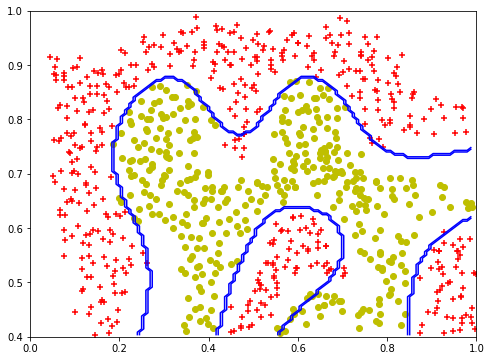

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X2[pos2[:,0],0],X2[pos2[:,0],1],c="r",marker="+")
plt.scatter(X2[neg2[:,0],0],X2[neg2[:,0],1],c="y",marker="o")

X_5,X_6 = np.meshgrid(
    np.linspace(X2[:,0].min(),X2[:,1].max(),num=100),
    np.linspace(X2[:,1].min(),X2[:,1].max(),num=100)
)
plt.contour(X_5, X_6, classifier2.predict(np.array([X_5.ravel(), X_6.ravel()]).T).reshape(X_5.shape),1,colors="b")
plt.xlim(0,1)
plt.ylim(0.4,1)

# DATASET 3

In [11]:
mat3 = loadmat('ex6data3.mat')
X3 = mat3['X']
y3 = mat3['y']
X3.shape, y3.shape

((211, 2), (211, 1))

In [12]:
Xval = mat3['Xval']
yval = mat3['yval']
Xval.shape, yval.shape

((200, 2), (200, 1))

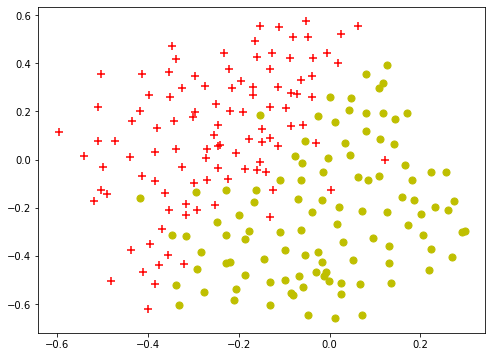

In [13]:
m3, n3 = X3.shape

pos3, neg3 = (y3==1).reshape(m3, 1), (y3==0).reshape(m3, 1)

plt.figure(figsize=(8, 6))
plt.scatter(X3[pos3[:, 0], 0], X3[pos3[:, 0], 1], c='r', marker='+', s=50)
plt.scatter(X3[neg3[:, 0], 0], X3[neg3[:, 0], 1], c='y', marker='o', s=50)


**HYPERPARAMETER TUNING**

In [14]:
def datasetParams(X, y, Xval, yval, vals):
    
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C = i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C, gamma=gamma)
            classifier.fit(X, y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval, yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma

    return best_c, best_gamma

In [15]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C, gamma = datasetParams(X3, y3.ravel(), Xval, yval.ravel(), vals)
classifier3 = SVC(C=C, gamma=gamma)
classifier3.fit(X3, y3.ravel())

SVC(C=0.3, gamma=100.0)

(-0.7, 0.5)

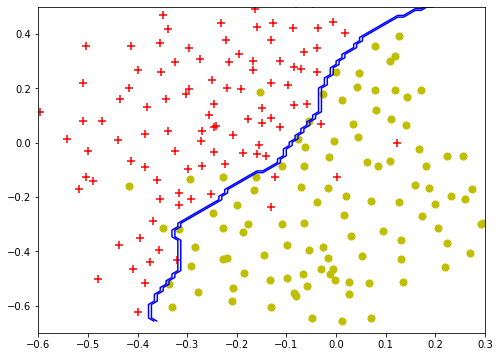

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(X3[pos3[:,0],0],X3[pos3[:,0],1],c="r",marker="+",s=50)
plt.scatter(X3[neg3[:,0],0],X3[neg3[:,0],1],c="y",marker="o",s=50)

X_7,X_8 = np.meshgrid(
    np.linspace(X3[:,0].min(),X3[:,1].max(),num=100),
    np.linspace(X3[:,1].min(),X3[:,1].max(),num=100)
)
plt.contour(X_7, X_8, classifier3.predict(np.array([X_7.ravel(), X_8.ravel()]).T).reshape(X_7.shape), 1, colors="b")

plt.xlim(-0.6,0.3)
plt.ylim(-0.7,0.5)

# SPAM CLASSIFICATION

In [17]:
file = open('emailSample1.txt', 'r').read()
vocab_list = open('vocab.txt', 'r').read()

In [18]:
vocabList = vocab_list.split('\n')[:-1]
vocabList_d = {}

for word in vocabList:
    value, key = word.split('\t')[:]
    vocabList_d[key] = value

**PROCESSING EMAIL**

In [19]:
def processEmail(email_contents, vocabList_d):
    
    #Lower
    email_contents = email_contents.lower()
    
    # Handle numbers
    email_contents = re.sub("[0-9]+","number",email_contents)
    
    # Handle URLS
    email_contents = re.sub("[http|https]://[^\s]*","httpaddr",email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub("[^\s]+@[^\s]+","emailaddr",email_contents)
    
    # Handle $ sign
    email_contents = re.sub("[$]+","dollar",email_contents)
    
    # Strip all special characters
    specialChar = ["<","[","^",">","+","?","!","'",".",",",":"]
    for char in specialChar:
        email_contents = email_contents.replace(str(char),"")
    email_contents = email_contents.replace("\n"," ")
    
    # Stem the word
    ps = PorterStemmer()
    email_contents = [ps.stem(token) for token in email_contents.split(" ")]
    email_contents= " ".join(email_contents)
    
    # Process the email and return word_indices
    
    word_indices=[]
    
    for char in email_contents.split():
        if len(char) > 1 and char in vocabList_d:
            word_indices.append(int(vocabList_d[char]))
    
    return word_indices
word_indices = processEmail(file,vocabList_d)

**EXTRACTING FEATURES FROM EMAIL**

In [20]:
def emailFeatures(word_indices, vocabList_d):
    n = len(vocabList_d)
    features = np.zeros((n, 1))
    
    for i in word_indices:
        features[i] = 1
        
    return features   

In [21]:
features = emailFeatures(word_indices, vocabList_d)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  43.0


**TRAINING SVM FOR SPAM CLASSIFICATION**

In [22]:
spam_mat = loadmat('spamTrain.mat')
X_train =spam_mat["X"]
y_train = spam_mat["y"]

In [23]:
C =0.1
spam_svc = SVC(C=0.1, kernel ="linear")
spam_svc.fit(X_train, y_train.ravel())
print("Training Accuracy:",(spam_svc.score(X_train, y_train.ravel()))*100,"%")

Training Accuracy: 99.825 %


In [24]:
spam_mat_test = loadmat("spamTest.mat")
X_test = spam_mat_test["Xtest"]
y_test = spam_mat_test["ytest"]

spam_svc.predict(X_test)
print("Test Accuracy:",(spam_svc.score(X_test, y_test.ravel()))*100,"%")

Test Accuracy: 98.9 %


**TOP PREDICTORS FOR SPAM**

In [25]:
weights = spam_svc.coef_[0]
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1), weights.reshape(1899,1)))

df = pd.DataFrame(weights_col)
df.sort_values(by=[1], ascending = False, inplace=True)
predictors = []
idx=[]

for i in df[0][:15]:
    for keys, values in vocabList_d.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))
print("Top predictors of spam:")
for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
